In [1]:
import numpy as np
from utils import generate_sparse_randn
import matplotlib.pyplot as plt

In [2]:
sparse_signals = []
n = 1000
max_sparse = 200
dim = 1000
for i in range(n):
    for j in range(max_sparse):
        sparse_signals.append(generate_sparse_randn(dim,j+1))

94.31452405106798


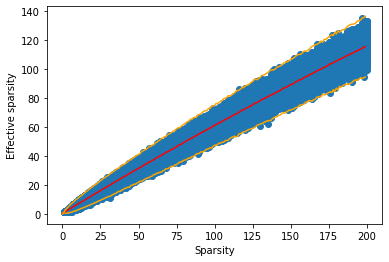

In [4]:
norms = np.zeros((len(sparse_signals), 2))
norms[:,0] = np.linalg.norm(sparse_signals, 1, 1)
norms[:,1] = np.linalg.norm(sparse_signals, 2, 1)
norms[:,0] = np.square(norms[:,0]/norms[:,1])
norms[:,1] = np.ones(max_sparse*n)
norms[0,1] = 0
norms[:,1] = (norms[:,1].cumsum()%max_sparse)+1


plt.xlabel('Sparsity')
plt.ylabel('Effective sparsity')
plt.scatter(norms[:,1], norms[:,0])

#---------------------------------------

y = np.zeros((max_sparse, 3))

for i in range(1,max_sparse):
    mean = norms[norms[:,1] == i, 0].mean()
    std = norms[norms[:,1] == i, 0].std()
    y[i] = [mean-4*std, mean, mean+4*std]
plt.plot(range(max_sparse), y[:, 0], color = 'orange')
plt.plot(range(max_sparse), y[:, 1], color='red')
plt.plot(range(max_sparse), y[:, 2], color='orange')
print(mean-std*4)
plt.savefig("es.png", dpi=600)